In [1]:
from datetime import datetime

import numpy as np
import pandas as pd
from influxdb import InfluxDBClient

import matplotlib.pyplot as plt

# Load data

In [2]:
# Connect to InfluxDB and fetch data
client = InfluxDBClient(host='10.10.10.11')
client.switch_database('ISS')

In [3]:
#query1 = 'SELECT * FROM "DE1Thing_HMD8310"'
query1 = 'SELECT * FROM "EP_Battery.Thing_HMD8310"'
results1 = client.query(query1)
battery_data = pd.DataFrame.from_records(results1.get_points())

print(battery_data.shape)
battery_data.head(2)

(273961, 110)


time  AVG_PACK_SOC  AvgSOC  AvgSOH BATT_PACK_1_DISCONN  \
0  2022-08-30T00:00:00Z           NaN    77.0   100.0                None   
1  2022-08-30T00:01:00Z           NaN    77.0   100.0                None   

  BATT_PACK_1_FAULT BATT_PACK_1_WARN BATT_PACK_2_DISCONN BATT_PACK_2_FAULT  \
0              None             None                None              None   
1              None             None                None              None   

  BATT_PACK_2_WARN  ... PACK_1_STATUS PACK_2_STATUS PACK_3_STATUS  \
0             None  ...           NaN           NaN           NaN   
1             None  ...           NaN           NaN           NaN   

  PACK_4_STATUS PACK_5_STATUS PACK_6_STATUS PACK_7_STATUS RunningState  \
0           NaN           NaN           NaN           NaN         True   
1           NaN           NaN           NaN           NaN         True   

  Voltage       valuestreamname  
0   900.0  ISS.Onshore.Model.VS  
1   900.0  ISS.Onshore.Model.VS  

[2 rows x 110 columns]

# Data Report

In [6]:
from ydata_profiling import ProfileReport

# Calculate the number of rows to select (30% of total rows)
num_rows = int(len(battery_data))

# Select the first 30% of rows
undersampled_data = battery_data.head(num_rows)

profile = ProfileReport(undersampled_data, title='Profiling Report', html={"minify_html": True})
profile.to_file("minified_report.html")

/home/user/miniconda3/envs/time_series_env/lib/python3.11/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/user/miniconda3/envs/time_series_env/lib/python3.11/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/home/user/miniconda3/envs/time_series_env/lib/python3.11/site-packages/visions/backends/shared/nan_handling.py:50: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.5

In [ ]:
# Without correlations
profile = battery_data.profile_report(
    title="Report without correlations",
    correlations={
        "auto": {"calculate": False},
        "pearson": {"calculate": False},
        "spearman": {"calculate": False},
        "kendall": {"calculate": False},
        "phi_k": {"calculate": False},
        "cramers": {"calculate": False},
    },
)

# Basic EDA

In [19]:
battery_data.nunique()
battery_data.describe()

AVG_PACK_SOC        AvgSOC         AvgSOH  BATT_ROOM_TEMP  \
count  207796.000000  2.739610e+05  273961.000000   207796.000000   
mean       81.221869  1.773910e+03      58.085927       20.519157   
std        15.580271  5.215529e+05      57.944050        5.078350   
min         0.000000  0.000000e+00       0.000000        0.000000   
25%        84.000000  0.000000e+00       0.000000       19.780500   
50%        85.000000  8.200000e+01     100.000000       22.096800   
75%        85.000000  8.500000e+01     100.000000       23.305300   
max       904.000000  1.576700e+08   15911.533333       26.796600   

            Current  MAX_CELL_TEMP   MAX_CELL_VOL   MAX_PACK_SOC  \
count  2.739610e+05  207796.000000  207796.000000  207796.000000   
mean   1.773826e+03      22.213513       3.324201      80.822003   
std    5.327049e+05      64.760203       5.768186      16.639031   
min   -1.131400e+03       0.000000       0.000000       0.000000   
25%   -4.049990e+00       0.000000       0.000000      84.000000   
50%    0.000000e+00      24.000000       4.026000      85.000000   
75%    0.000000e+00      26.000000       4.035000      85.000000   
max    1.610400e+08     903.000000     100.000000      88.000000   

       MAX_UNCONN_PACK_VOL  MIN_CELL_TEMP  ...  PACK7_CRIDATA_SOC  \
count        207796.000000  207796.000000  ...      207795.000000   
mean            223.953117      14.704499  ...          81.528547   
std             392.431491       9.610119  ...          15.046410   
min               0.000000       0.000000  ...          -0.199951   
25%               0.000000       0.000000  ...          84.000000   
50%               0.000000      20.000000  ...          85.000000   
75%              80.000000      22.000000  ...          85.000000   
max             928.000000      80.000000  ...         208.925083   

       PACK7_CRIDATA_SOH  PACK_1_STATUS  PACK_2_STATUS  PACK_3_STATUS  \
count      207795.000000  207796.000000  207796.000000  207796.000000   
mean          116.769888       0.002069       0.002536       4.718103   
std           279.042911       0.640069       1.033372      65.127621   
min             0.000000       0.000000       0.000000       0.000000   
25%           100.000000       0.000000       0.000000       0.000000   
50%           100.000000       0.000000       0.000000       0.000000   
75%           100.000000       0.000000       0.000000       0.000000   
max          3962.000000     274.000000     471.000000     904.000000   

       PACK_4_STATUS  PACK_5_STATUS  PACK_6_STATUS  PACK_7_STATUS  \
count  207796.000000  207796.000000  207796.000000  207796.000000   
mean        0.002536       0.419984       0.569867       0.035626   
std         1.033372       5.854998      12.368655       5.698347   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max       471.000000     471.000000    3963.000000     921.000000   

             Voltage  
count  273961.000000  
mean     3121.465811  
std      2781.665774  
min         0.000000  
25%       918.000000  
50%       920.000000  
75%      6553.000000  
max      6554.000000  

[8 rows x 86 columns]

# Correlation analysis

In [4]:
correlation_matrix = battery_data.corr()

/tmp/ipykernel_18720/1225721509.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = battery_data.corr()


In [5]:
correlation_matrix["AVG_PACK_SOC"].sort_values(ascending=True)[50:]

PACK7_CRIDATA_CHARGE_CURR_LIMIT       0.605364
PACK3_CRIDATA_DISCHARGE_CURR_LIMIT    0.635488
PACK4_CRIDATA_BATT_VOL                0.642888
PACK2_CRIDATA_BATT_VOL                0.643051
PACK6_CRIDATA_CHARGE_CURR_LIMIT       0.645117
PACK5_CRIDATA_CHARGE_CURR_LIMIT       0.666299
PACK3_CRIDATA_CHARGE_CURR_LIMIT       0.680631
PACK1_CRIDATA_CHARGE_CURR_LIMIT       0.686964
BATT_ROOM_TEMP                        0.715683
PACK7_CRIDATA_DISCHARGE_CURR_LIMIT    0.853221
MIN_PACK_SOC                          0.868199
PACK3_CRIDATA_BATT_VOL                0.877428
PACK1_CRIDATA_BATT_VOL                0.879348
PACK7_CRIDATA_BATT_VOL                0.879812
PACK2_CRIDATA_DISCHARGE_CURR_LIMIT    0.890391
PACK4_CRIDATA_AVG_CELL_VOL            0.896901
PACK6_CRIDATA_AVG_CELL_VOL            0.897213
PACK5_CRIDATA_SOC                     0.903597
PACK1_CRIDATA_SOC                     0.905557
PACK7_CRIDATA_SOC                     0.907132
MAX_PACK_SOC                          0.915995
PACK6_CRIDATA

Text(0.5, 0.98, 'Top 50 correlated features to AVG_PACK_SOC')

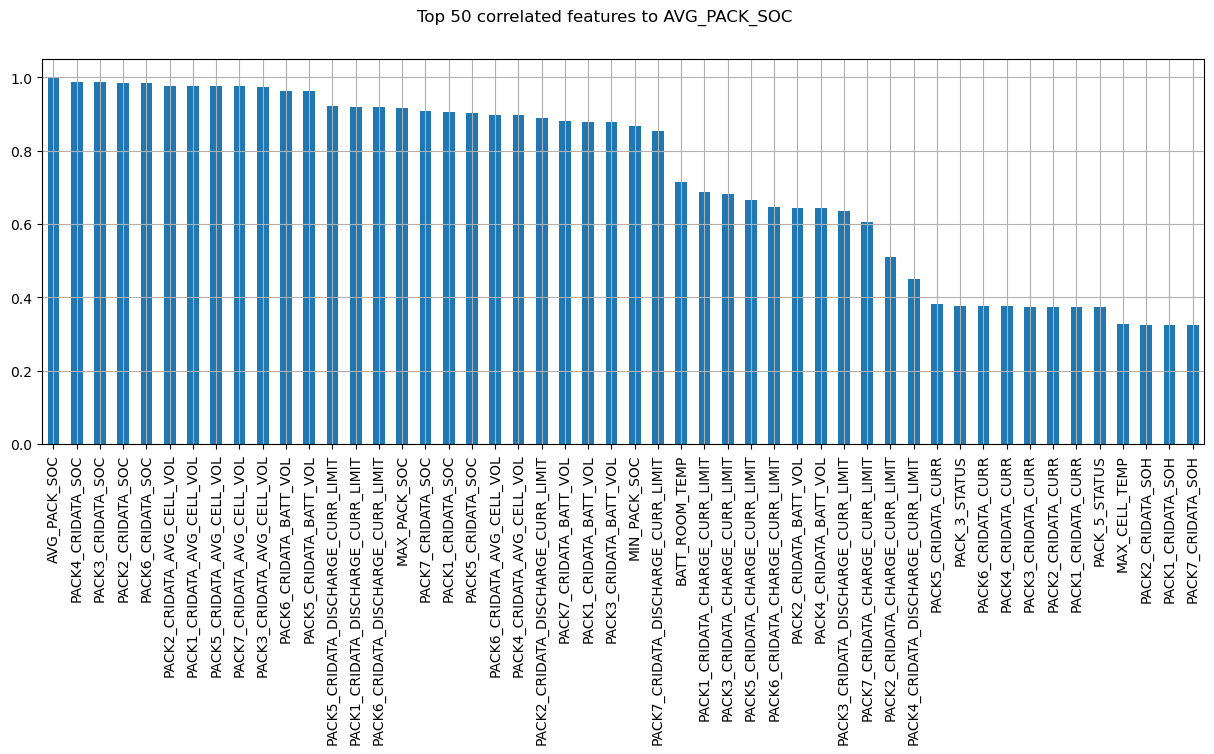

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
correlation_matrix["AVG_PACK_SOC"].abs().sort_values(ascending=False)[:50].plot.bar()
plt.xlabel('', fontsize=64)
plt.ylabel('', fontsize=64)
plt.grid(True)
plt.suptitle("Top 50 correlated features to AVG_PACK_SOC")

Text(0.5, 0.98, 'Time x AVG_PACK_SOC')

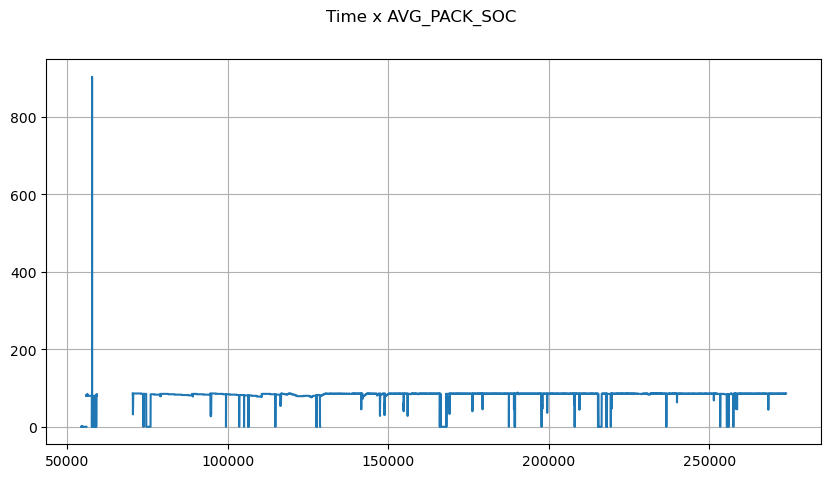

In [7]:
plt.figure(figsize=(10, 5))
battery_data["AVG_PACK_SOC"].plot()
plt.grid(True)
plt.suptitle("Time x AVG_PACK_SOC")
# battery_data["PACK4_CRIDATA_SOC"].plot()
# battery_data["PACK3_CRIDATA_SOC"].plot()
# battery_data["PACK2_CRIDATA_AVG_CELL_VOL"].plot()

Text(0.5, 0.98, 'Time x AVG_PACK_SOC (Zoom)')

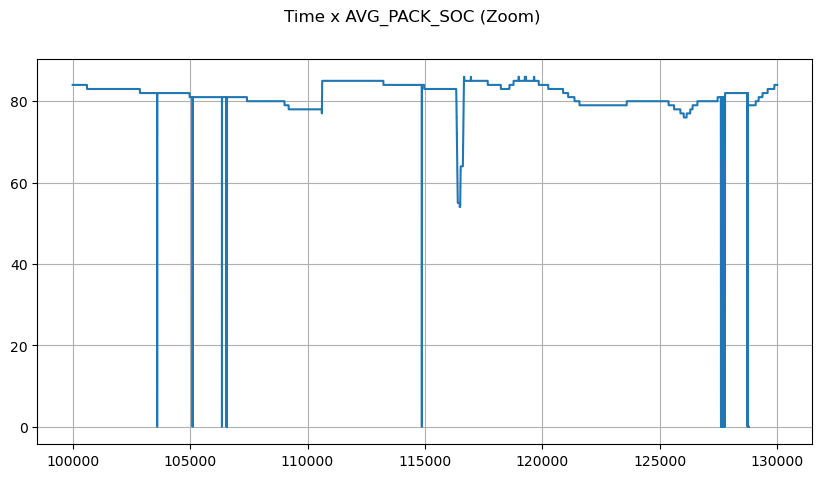

In [8]:
plt.figure(figsize=(10, 5))
battery_data.loc[100000:130000, "AVG_PACK_SOC"].plot()
plt.grid(True)
plt.suptitle("Time x AVG_PACK_SOC (Zoom)")

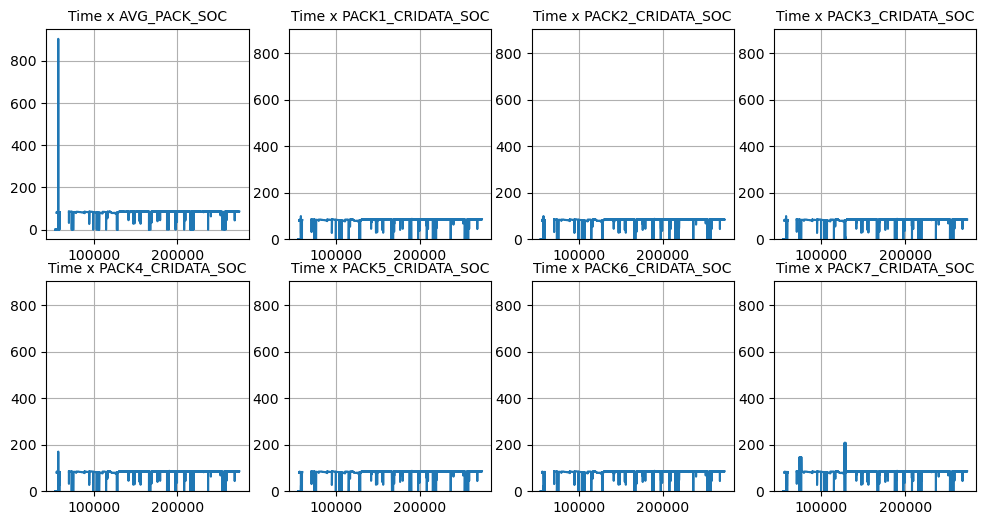

In [9]:
ymin = 0
ymax = battery_data["AVG_PACK_SOC"].max()

# Create a 2x4 grid of subplots
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    if i == 0:
        ax.plot(battery_data["AVG_PACK_SOC"])
        ax.grid(True)
        ax.set_title("Time x AVG_PACK_SOC", fontsize=10)
    else:
        ax.plot(battery_data[f"PACK{i}_CRIDATA_SOC"])
        ax.grid(True)
        ax.set_title(f"Time x PACK{i}_CRIDATA_SOC", fontsize=10)
        ax.set_ylim([ymin, ymax])

<AxesSubplot: >

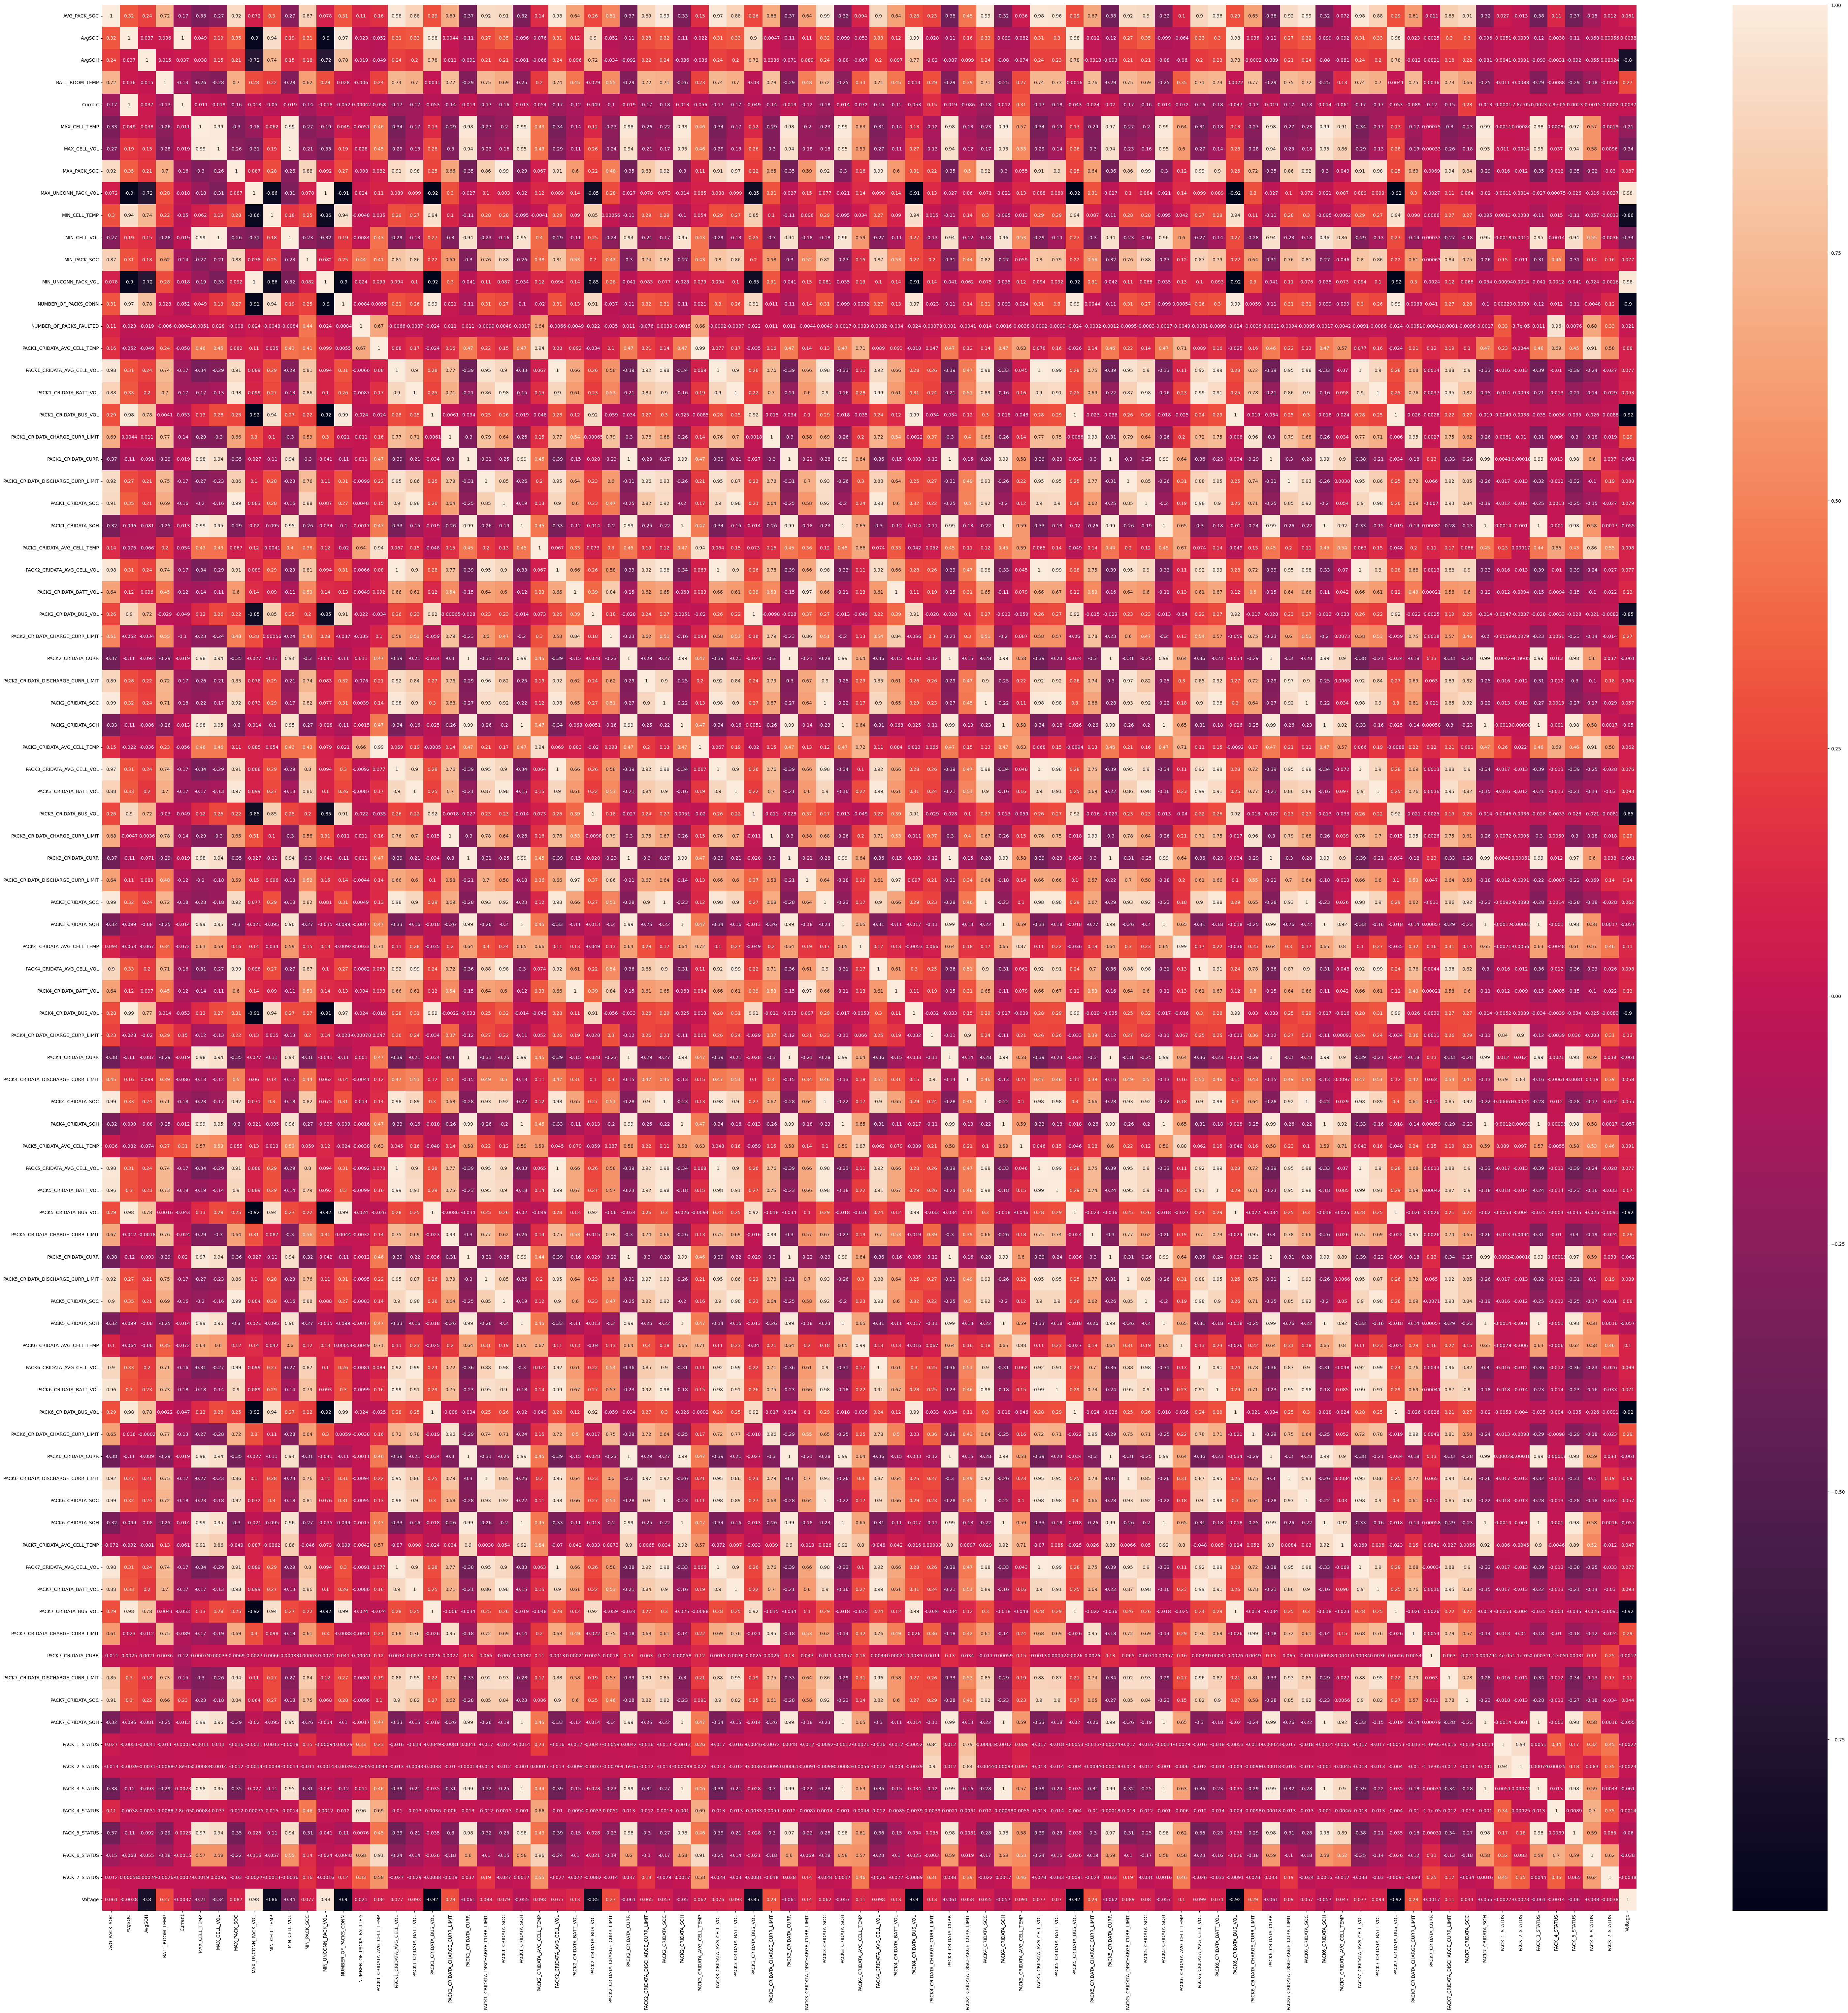

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(75,75))         # Sample figsize in inches
sns.heatmap(correlation_matrix, annot=True, ax=ax)

In [12]:
# correlation_matrix["AVG_PACK_SOC"].loc[
#    ["PACK7_CRIDATA_AVG_CELL_TEMP",
#     "PACK7_CRIDATA_AVG_CELL_VOL",
#     "PACK7_CRIDATA_BATT_VOL",
#     "PACK7_CRIDATA_BUS_VOL",
#     "PACK7_CRIDATA_CHARGE_CURR_LIMIT",
#     "PACK7_CRIDATA_CURR",
#     "PACK7_CRIDATA_DISCHARGE_CURR_LIMIT",
#     "PACK7_CRIDATA_SOC",
#     "PACK7_CRIDATA_SOH"]
# ]

CRIDATA_COLUMNS = [
    "CRIDATA_AVG_CELL_TEMP",
    "CRIDATA_AVG_CELL_VOL",
    "CRIDATA_BATT_VOL",
    "CRIDATA_BUS_VOL",
    "CRIDATA_CHARGE_CURR_LIMIT",
    "CRIDATA_CURR",
    "CRIDATA_DISCHARGE_CURR_LIMIT",
    "CRIDATA_SOC",
    "CRIDATA_SOH"
]

# Create 7 plots with 9 bars each for the CRIDATA
# plt.figure(figsize=(15, 5))
# correlation_matrix["AVG_PACK_SOC"].abs().sort_values(ascending=False)[:50].plot.bar()
# plt.xlabel('', fontsize=64)
# plt.ylabel('', fontsize=64)
# plt.grid(True)
# plt.suptitle("Top 50 correlated features to AVG_PACK_SOC")



/tmp/ipykernel_18720/2835726511.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels, rotation = 45)
/tmp/ipykernel_18720/2835726511.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels, rotation = 45)
/tmp/ipykernel_18720/2835726511.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels, rotation = 45)
/tmp/ipykernel_18720/2835726511.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels, rotation = 45)
/tmp/ipykernel_18720/2835726511.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels, rotation = 45)
/tmp/ipykernel_18720/2835726511.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels, rotation = 45)
/tmp/ipykernel_18720/2835726511.py:13: UserWar

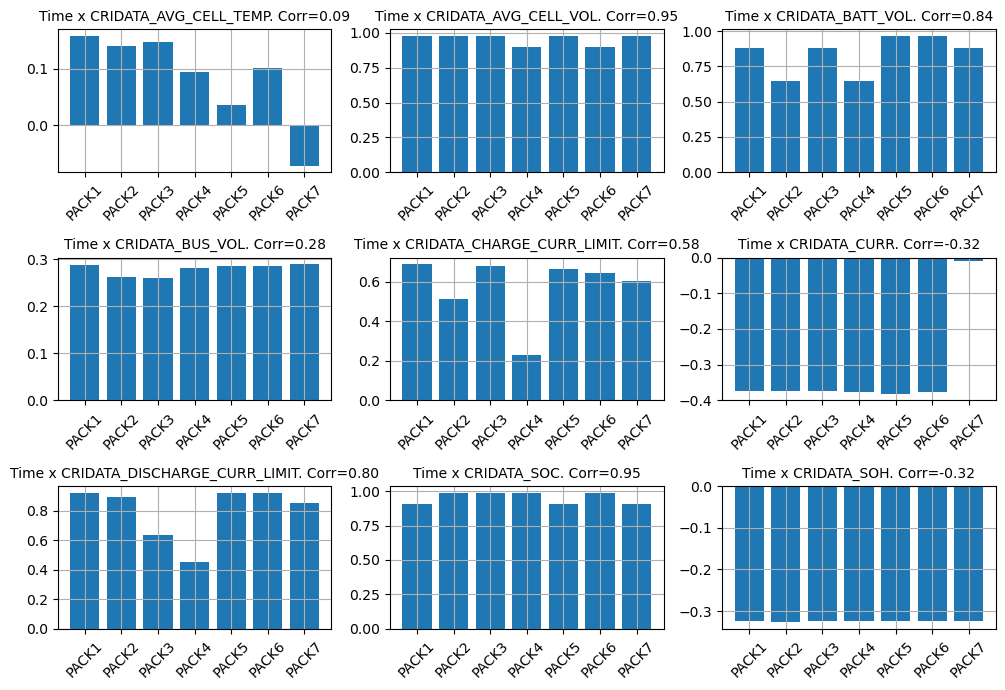

In [56]:
num_packs = 7
fig, axes = plt.subplots(3, 3, figsize=(10, 7))
for i, ax in enumerate(axes.flat):
    cridata_to_plot = CRIDATA_COLUMNS[i]
    columns_to_plot = []
    for j in range(1, num_packs+1):
        columns_to_plot.append(f"PACK{j}_" + cridata_to_plot)
    xlabels = ["PACK"+str(k) for k in range(1, 8)]
    data_to_plot = correlation_matrix["AVG_PACK_SOC"].loc[columns_to_plot]
    ax.bar(data_to_plot.index, data_to_plot.values)
    ax.grid(True)
    ax.set_title(f"Time x {cridata_to_plot}. Corr={data_to_plot.mean():.2f}", fontsize=10)
    ax.set_xticklabels(xlabels, rotation = 45)
    plt.tight_layout()

(-154.9, 471.0)

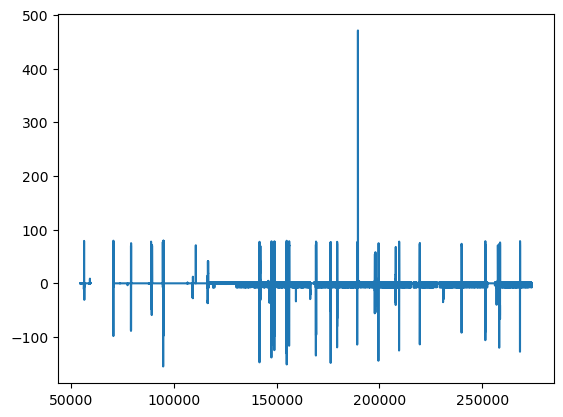

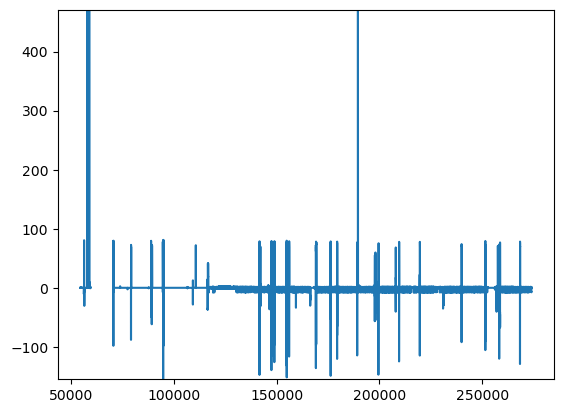

In [51]:
ymin = battery_data["PACK7_CRIDATA_CURR"].min()
ymax = battery_data["PACK7_CRIDATA_CURR"].max()

battery_data["PACK7_CRIDATA_CURR"].plot()

plt.figure()
battery_data["PACK2_CRIDATA_CURR"].plot()
ax = plt.gca()
ax.set_ylim([ymin, ymax])

<AxesSubplot: >

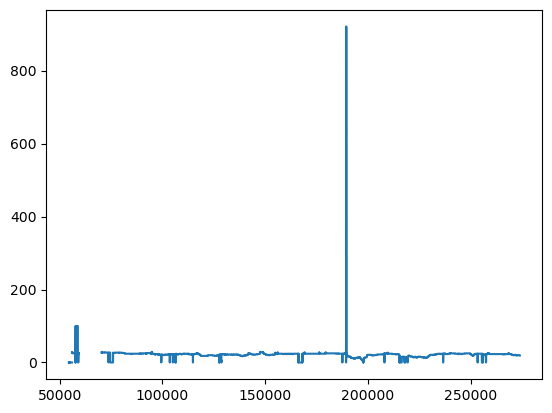

In [47]:
battery_data["PACK6_CRIDATA_AVG_CELL_TEMP"].plot()